In [21]:
import cPickle

# PARAMS
log_dir = "/home/sforesti/avakas/scratch/sforestier001/logs/CogSci2017/2017-01-16_09-55-15-COGSCI"
config_list = ["RMB"]
n_iter = 10


filename = log_dir + '/results/vocal.pickle'
with open(filename, 'r') as f:
    data_vocal = cPickle.load(f)

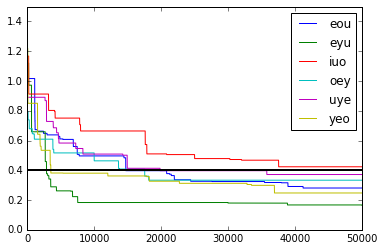

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

trial_list = range(1,n_iter + 1) 
config_name = "RMB"


for trial in [3]:
    human_sounds = data_vocal[config_name][trial]["human_sounds"]    
    for hs in human_sounds:
        plt.plot([data_vocal[config_name][trial]["errors"][i][hs] for i in range(len(data_vocal[config_name][trial]["errors"]))], label=hs)
        
plt.ylim([0, 1.5])       
plt.xlim([0, 50000])  
plt.plot((0, 50000), (0.4, 0.4), '-', lw=2)
plt.legend()

In [19]:
print [data_vocal[config_name][1]["errors"][i][human_sounds[0]] for i in range(len(data_vocal[config_name][1]["errors"]))]

[0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.25921815234553991, 0.2592181523